# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [8]:
# generate estimated age field
app_train['EST_AGE'] = app_train['DAYS_BIRTH'] / 365
app_train['EST_AGE'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: EST_AGE, dtype: float64

In [11]:
# discretization
app_train["EST_AGE_GROUP"] = pd.cut(app_train["EST_AGE"], 10)
app_train["EST_AGE_GROUP"].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: EST_AGE_GROUP, dtype: int64

In [13]:
app_train.groupby('EST_AGE_GROUP').mean()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,EST_AGE
EST_AGE_GROUP,,,,,,,,,,,,,,,,,,,,,
"(20.469, 25.378]",277118.454931,0.122012,0.248410,0.321442,0.626435,0.225967,146812.838906,420473.132064,21960.732015,379885.046374,...,0.000512,0.004898,0.009122,0.007217,0.033982,0.156576,0.269346,1.569868,0.002705,23.578455
"(25.378, 30.238]",277872.170284,0.111390,0.104718,0.384822,0.603828,0.546956,165428.742611,510049.971730,25966.069132,459252.060265,...,0.000906,0.000694,0.007288,0.007687,0.033868,0.231706,0.257379,1.794148,0.003351,28.067308
"(30.238, 35.099]",277950.762581,0.101900,0.098855,0.410226,0.630367,0.821858,178402.528319,573771.345316,27448.987418,515618.177545,...,0.000625,0.000078,0.006184,0.007768,0.034566,0.287046,0.252480,1.782475,0.003955,32.640455
"(35.099, 39.959]",278231.199650,0.089468,0.095359,0.405288,0.661143,0.846808,179638.253952,628073.474975,28280.686723,564980.878216,...,0.000551,0.000120,0.006156,0.007078,0.033818,0.279953,0.264875,1.828877,0.007998,37.582959
"(39.959, 44.819]",278847.830260,0.078984,0.094895,0.392763,0.684734,0.591078,181461.771472,648989.912900,28760.253606,583220.956358,...,0.000793,0.000074,0.006061,0.006061,0.034195,0.295607,0.260745,1.878371,0.015043,42.354168
"(44.819, 49.679]",278129.980793,0.074437,0.090292,0.360701,0.747136,0.298971,180215.213831,667663.245956,28975.970868,597111.565060,...,0.000466,0.000000,0.006798,0.006564,0.033624,0.306129,0.251239,1.877796,0.032876,47.205792
"(49.679, 54.54]",278234.514906,0.067911,0.082518,0.313946,0.736913,0.116176,172035.743768,655650.163129,28281.306010,589099.545369,...,0.000358,0.000030,0.006139,0.007510,0.036591,0.293964,0.265432,1.944616,0.112896,52.176683
"(54.54, 59.4]",278670.381593,0.055926,0.080000,0.257917,0.748545,0.045329,159623.480525,641656.692083,27021.529128,577424.158235,...,0.000306,0.000031,0.005995,0.006796,0.033738,0.276105,0.277046,2.024955,0.519541,56.913551
"(59.4, 64.26]",278065.054145,0.052953,0.077370,0.207513,0.770309,0.017627,146854.160421,604548.584017,25642.715478,543748.358674,...,0.000072,0.000000,0.007000,0.007042,0.035457,0.223594,0.281253,2.134413,0.781398,61.701896


Text(0, 0.5, 'Target')

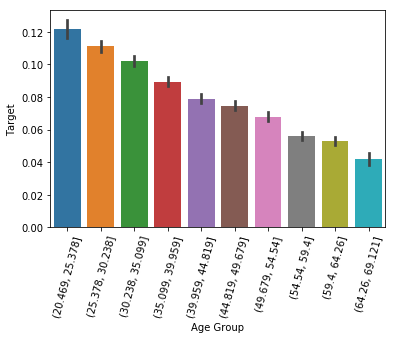

In [12]:
# plot
import seaborn as sns
x = app_train['EST_AGE_GROUP']
y = app_train['TARGET']
sns.barplot(x, y)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group'); plt.ylabel('Target')